In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from scipy.optimize import curve_fit
from scipy import interpolate
from google.colab import files

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['Bitcoin Historical Data - Investing.com.csv']))

Saving Bitcoin Historical Data - Investing.com.csv to Bitcoin Historical Data - Investing.com (4).csv


In [ ]:
data["Price"] = data["Price"].str.replace(",", "").astype(float).values[::-1]


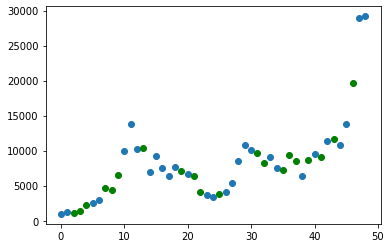

In [ ]:
train_ind = np.random.rand(len(data)) < 0.6
data_train = data[train_ind]
data_test = data[~train_ind]

plt.scatter(data_train.index, data_train["Price"])
plt.scatter(data_test.index, data_test["Price"], c="green")

# Mean Squared Error (MSE)
[from [Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)] "measures the average of the squares of the errors—that is, the *average* **squared** `difference` between the **estimated** values and the **actual** value".

Which means, that our function is defined as:
$$
\text{let } D_{actual} = (d_1, ..., d_n) \text{, } D_{expected} = (e_1,..., e_n)\\
MSE(D_{actual}, D_{expected}) = 
\frac{1}{|D_{actual}|} 
\left ( \sum_{k=0}^n d_k - e_k \right )^2
$$

In [ ]:
def model(x, *args):
  return sum([arg * x**i for (i,arg) in enumerate(args)])

def MSE(y, y_pred):
  return 1/len(y) * sum((y-y_pred)**2)

def smoothen(x, y):
  x_new = np.linspace(0, 29, 1000)
  a_BSpline = interpolate.make_interp_spline(x, y)
  y_new = a_BSpline(x_new)

  return x_new, y_new


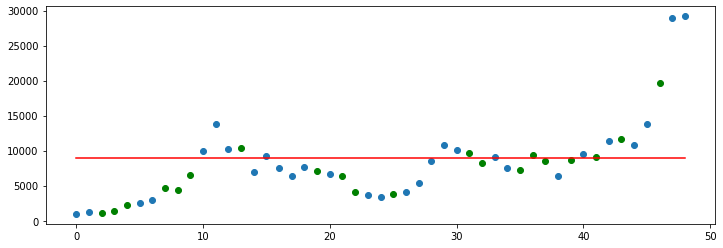

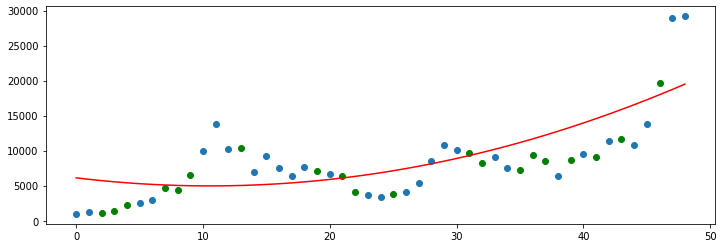

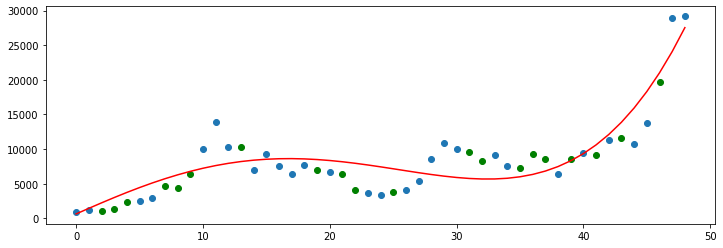

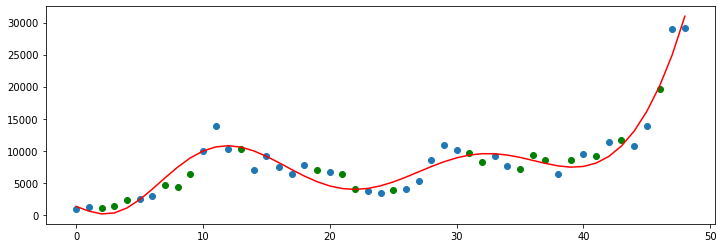

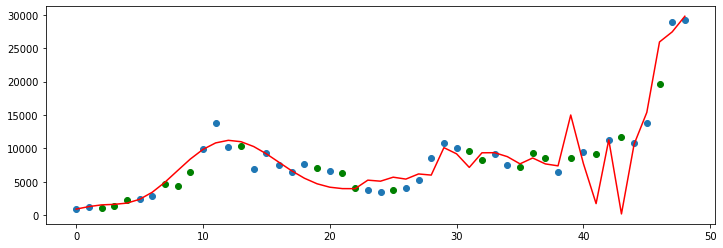

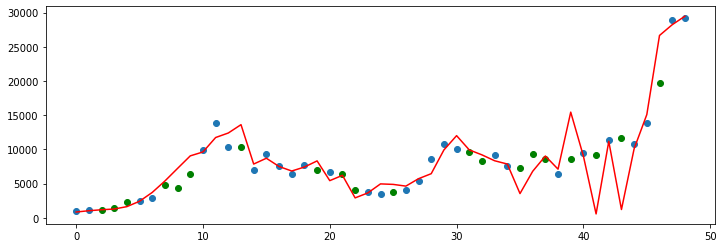

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


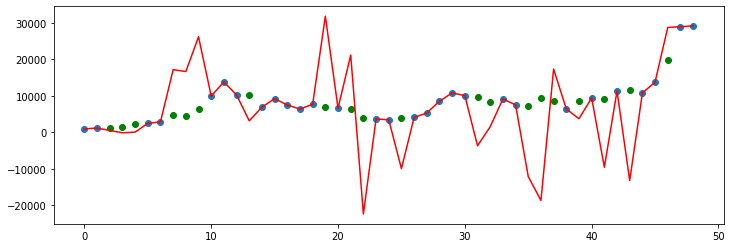

In [ ]:
num_param = [1,3,5,10,15,20,29]
MSE_train = []
MSE_test = []

for i in num_param:
  popt, pcov = curve_fit(model, data_train.index, data_train["Price"], p0=np.ones(i))

  data_train_predicted = model(data_train.index, *popt)
  data_test_predicted = model(data_test.index, *popt)

  MSE_train.append(MSE(data_train["Price"], data_train_predicted))
  MSE_test.append(MSE(data_test["Price"], data_test_predicted))

  plt.figure(figsize=(12,4))
  plt.scatter(data_train.index, data_train["Price"])
  plt.scatter(data_test.index, data_test["Price"], c="green")
  plt.plot(model(data.index, *popt), c="red")
  plt.show()

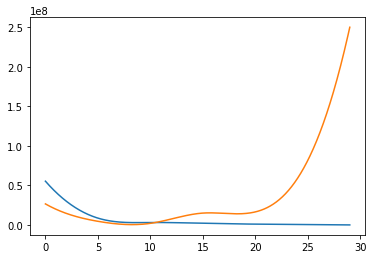

In [ ]:
plt.plot(*smoothen(num_param, MSE_train))
plt.plot(*smoothen(num_param, MSE_test))
plt.show()